# Problem Statement:
The primary objective of this project is to predict the approval or rejection of credit card applications.
The challenge lies in understanding the key factors influencing credit card approval decisions and
building a predictive model to assist in the decision-making process.

In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot, chi2_contingency, chi2
import seaborn as sns


In [3]:
test_data=pd.read_csv("test_data.csv")
test_data

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0
5,5029195,F,N,Y,0,94500.0,Working,Secondary / secondary special,Married,House / apartment,-18131,-617,1,0,0,0,Laborers,2.0,-18.0,0
6,5029213,F,N,Y,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22115,365243,1,0,1,0,NaN,2.0,-23.0,0
7,5051050,M,Y,N,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,-22407,-2174,1,0,0,0,Laborers,2.0,-9.0,0
8,5061569,F,N,N,0,189000.0,Working,Secondary / secondary special,Married,Municipal apartment,-18452,-137,1,0,0,0,Laborers,2.0,-37.0,0
9,5091430,F,N,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16202,-2939,1,1,1,0,Managers,2.0,-43.0,0


In [4]:
train_data=pd.read_csv("train_data.csv")
train_data

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0
5,5100411,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-13251,-3839,1,1,0,0,Accountants,2.0,-1.0,0
6,5022817,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-17262,-1617,1,0,0,0,Core staff,2.0,-16.0,0
7,5009811,F,N,N,1,202500.0,Working,Secondary / secondary special,Married,House / apartment,-11813,-3266,1,1,1,0,Sales staff,3.0,-21.0,0
8,5113922,F,N,N,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,-23478,365243,1,0,0,0,NaN,1.0,-50.0,0
9,5021541,F,Y,N,1,306000.0,Working,Higher education,Married,House / apartment,-9310,-1678,1,0,0,0,NaN,3.0,-13.0,0


In [5]:
train_data.shape

(29165, 20)

In [6]:
test_data.shape

(7292, 20)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
ID                     29165 non-null int64
Gender                 29165 non-null object
Has a car              29165 non-null object
Has a property         29165 non-null object
Children count         29165 non-null int64
Income                 29165 non-null float64
Employment status      29165 non-null object
Education level        29165 non-null object
Marital status         29165 non-null object
Dwelling               29165 non-null object
Age                    29165 non-null int64
Employment length      29165 non-null int64
Has a mobile phone     29165 non-null int64
Has a work phone       29165 non-null int64
Has a phone            29165 non-null int64
Has an email           29165 non-null int64
Job title              20138 non-null object
Family member count    29165 non-null float64
Account age            29165 non-null float64
Is high risk           29165 non-null int

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
ID                     7292 non-null int64
Gender                 7292 non-null object
Has a car              7292 non-null object
Has a property         7292 non-null object
Children count         7292 non-null int64
Income                 7292 non-null float64
Employment status      7292 non-null object
Education level        7292 non-null object
Marital status         7292 non-null object
Dwelling               7292 non-null object
Age                    7292 non-null int64
Employment length      7292 non-null int64
Has a mobile phone     7292 non-null int64
Has a work phone       7292 non-null int64
Has a phone            7292 non-null int64
Has an email           7292 non-null int64
Job title              4996 non-null object
Family member count    7292 non-null float64
Account age            7292 non-null float64
Is high risk           7292 non-null int64
dtypes: float64(3),

In [9]:
train_data.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [10]:
test_data.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,7.292000e+03,7292.000000,7.292000e+03,7292.000000,7292.000000,7292.0,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000
mean,5.078209e+06,0.428415,1.858672e+05,-15957.958722,59283.630691,1.0,0.230389,0.294158,0.087493,2.202139,-26.270022,0.016045
std,4.208243e+04,0.744350,1.032964e+05,4190.990010,137642.577749,0.0,0.421111,0.455695,0.282576,0.909726,16.563032,0.125657
min,5.008809e+06,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.041912e+06,0.000000,1.170000e+05,-19382.000000,-3141.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.069416e+06,0.000000,1.575000e+05,-15522.000000,-1534.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.115503e+06,1.000000,2.250000e+05,-12454.000000,-397.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150487e+06,14.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,0.000000,1.000000


In [11]:
train_data.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [12]:
test_data.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              2296
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [13]:
#Function that will return the value count and frequency of each observation within a feature
def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [14]:
train_data["Has an email"].value_counts(normalize=True) * 100

0    90.972056
1     9.027944
Name: Has an email, dtype: float64

In [15]:
value_cnt_norm_cal(train_data,"Has an email")

,Count,Frequency (%)
0,26532,90.972056
1,2633,9.027944


In [16]:
# function to create display general information about the feature
def gen_info_feat(df,feature):
    if feature=='Age':
        
        # change the feature to be express in positive numbers days
        print('Description:\n{}'.format((np.abs(df[feature])/365.25).describe()))
        print('*'*50)
        print('Object type:{}'.format(df[feature].dtype))
    elif feature=='Employment length':
        # select only the rows where the rows are negative to ignore whose who have retired or unemployed
        employment_len_no_ret = train_data['Employment length'][train_data['Employment length'] < 0]
        employment_len_no_ret_yrs = np.abs(employment_len_no_ret)/365.25
        print('Description:\n{}'.format((employment_len_no_ret_yrs).describe()))
        print('*'*50)
        print('Object type:{}'.format(employment_len_no_ret.dtype))
    elif feature=='Account age':
        # change the account age to a positive number of months
        print('Description:\n{}'.format((np.abs(df[feature])).describe()))
        print('*'*50)
        print('Object type:{}'.format(df[feature].dtype))
    else:
        print('Description:\n{}'.format(df[feature].describe()))
        print('*'*50)
        print('Object type:\n{}'.format(df[feature].dtype))
        print('*'*50)
        value_cnt = value_cnt_norm_cal(df,feature)
        print('Value count:\n{}'.format(value_cnt))

In [17]:
# function to create a pie chart plot
def create_pie_plot(df,feature):
    if feature=='Dwelling'or 'Education level':
        ratio_size = value_cnt_norm_cal(df, feature)
        ratio_size_len = len(ratio_size.index)
        ratio_list = []
        for i in range(ratio_size_len):
            ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
        fig, ax = plt.subplots(figsize=(8,8))
        # %1.2f%% display decimals in the pie chart with 2 decimal places
        plt.pie(ratio_list, startangle=90, wedgeprops={'edgecolor' :'black'})
        plt.title('Pie chart of {}'.format(feature))
        plt.legend(loc='best',labels=ratio_size.index)
        plt.axis('equal')
        return plt.show()
    else:
        ratio_size = value_cnt_norm_cal(df, feature)
        ratio_size_len = len(ratio_size.index)
        ratio_list = []
        for i in range(ratio_size_len):
            ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
        fig, ax = plt.subplots(figsize=(8,8))
        # %1.2f%% display decimals in the pie chart with 2 decimal places
        plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor' :'black'})
        plt.title('Pie chart of {}'.format(feature))
        plt.legend(loc='best')
        plt.axis('equal')
        return plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023934590BA8>,
      dtype=object)

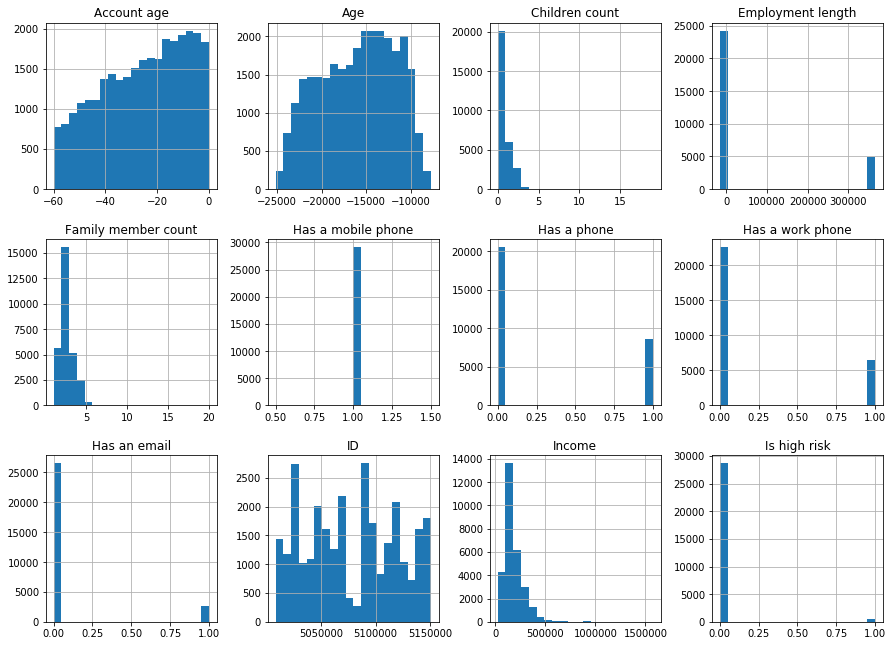

In [18]:
train_data.hist(figsize=(15,15), layout=(4,4), bins=20)

ID                        AxesSubplot(0.125,0.749828;0.133621x0.130172)
Children count         AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Income                  AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Age                    AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Employment length      AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Has a mobile phone        AxesSubplot(0.125,0.593621;0.133621x0.130172)
Has a work phone       AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Has a phone             AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Has an email           AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Family member count    AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Account age               AxesSubplot(0.125,0.437414;0.133621x0.130172)
Is high risk           AxesSubplot(0.285345,0.437414;0.133621x0.130172)
dtype: object

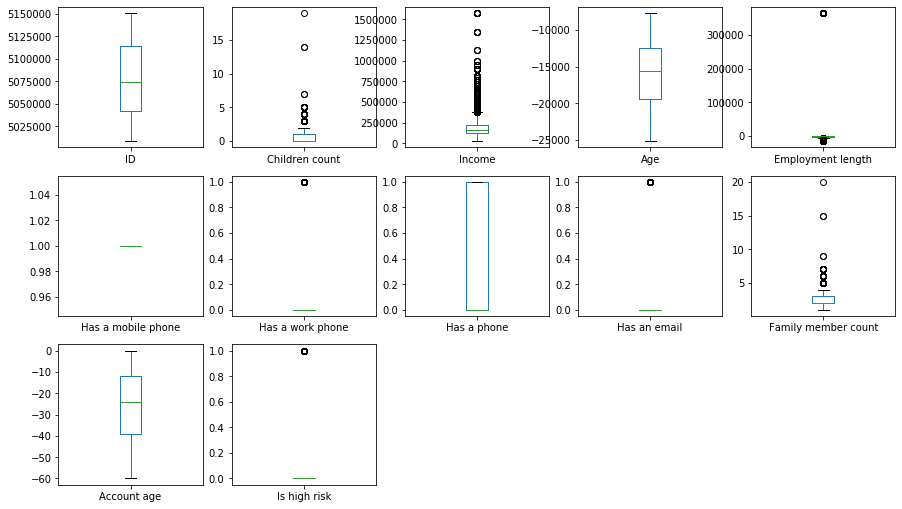

In [19]:
train_data.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

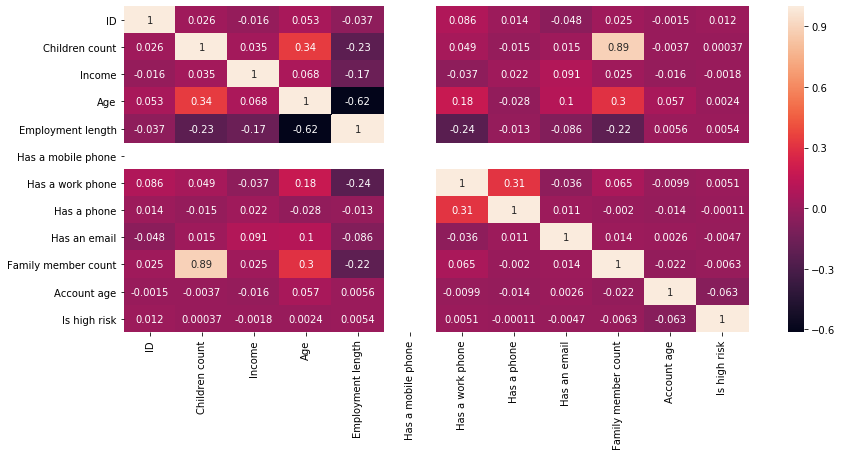

In [20]:
plt.figure(figsize=[14,6])
sns.heatmap(train_data.corr(), annot = True,)

In [21]:
gen_info_feat(train_data,'Gender')

Description:
count     29165
unique        2
top           F
freq      19549
Name: Gender, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
F  19549      67.028973
M   9616      32.971027


In [22]:
gen_info_feat(train_data,'Age')

Description:
count    29165.000000
mean        43.749425
std         11.507180
min         21.095140
25%         34.154689
50%         42.614648
75%         53.234771
max         68.862423
Name: Age, dtype: float64
**************************************************
Object type:int64


In [25]:
gen_info_feat(train_data,'Has a car')

Description:
count     29165
unique        2
top           N
freq      18128
Name: Has a car, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
N  18128      62.156695
Y  11037      37.843305


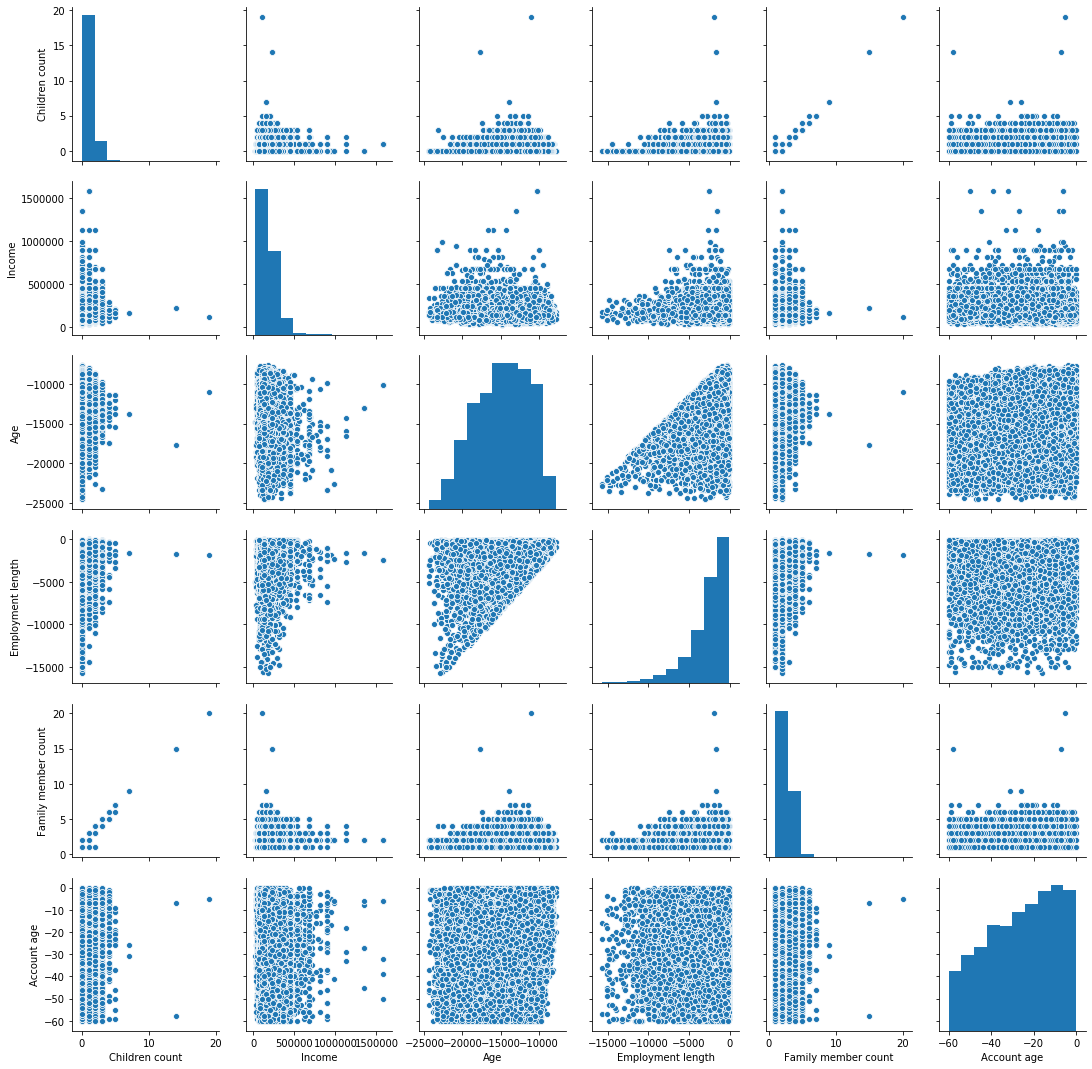

In [30]:
sns.pairplot(train_data[train_data['Employment length'] < 0].drop(['ID','Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email','Is high risk'],axis=1))
plt.show()

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self,feat_with_outliers = ['Family member count','Income', 'Employment length']):
        self.feat_with_outliers = feat_with_outliers
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_outliers).issubset(df.columns)):
            # 25% quantile
            Q1 = df[self.feat_with_outliers].quantile(.25)
            # 75% quantile
            Q3 = df[self.feat_with_outliers].quantile(.75)
            IQR = Q3 - Q1
            # keep the data within 3 IQR
            df = df[~((df[self.feat_with_outliers] < (Q1 - 3 * IQR)) |(df[self.feat_with_outliers] > (Q3 + 3 * IQR))).any(axis=1)]
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [33]:
class DropFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,feature_to_drop = ['ID','Has a mobile phone','Children count','Job title','Account age']):
        self.feature_to_drop = feature_to_drop
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feature_to_drop).issubset(df.columns)):
            df.drop(self.feature_to_drop,axis=1,inplace=True)
            return df
        else:
            print("One or more features are not in the dataframe")
            return df